In [ ]:
import numpy 
import tensorflow as tf
import os

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


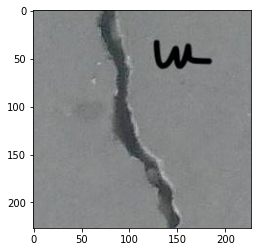

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('gdrive/MyDrive/archive/Positive/00001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(227, 227, 3)

In [ ]:
path = 'gdrive/MyDrive/minimal_sc'

In [ ]:
# !pip install split-folders

In [ ]:
# import splitfolders
# splitfolders.ratio(path, output="gdrive/MyDrive/output_sc", seed=1337, ratio=(.8, 0.1,0.1))

In [ ]:
train_dir = 'gdrive/MyDrive/output_sc/train' 
validation_dir = 'gdrive/MyDrive/output_sc/val' 
test_dir = 'gdrive/MyDrive/output_sc/test'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                         target_size=[227,227],
                                         batch_size=64,
                                         class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                        target_size=[227,227],
                                        batch_size=64,
                                        class_mode='categorical')

val_data = val_datagen.flow_from_directory(validation_dir,
                                        target_size=[224, 224],   
                                        batch_size=64, 
                                        class_mode='categorical')


Found 8048 images belonging to 2 classes.
Found 1006 images belonging to 2 classes.
Found 1006 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

In [ ]:
def create_model():
  vgg = VGG16(include_top=False, weights='imagenet', input_shape=(227,227,3))
  print(vgg.summary())
  for layer in vgg.layers:
    layer.trainable=False
  x = Flatten()(vgg.output)
  x = Dense(512,activation='relu')(x)
  x = Dense(512,activation='relu')(x)
  prediction = Dense(2,activation='sigmoid')(x)
  model = Model(inputs=vgg.input, outputs=prediction)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
checkpoint_path = "gdrive/MyDrive/train_ckpt/cp.ckpt"

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True, 
                                                 save_weights_only=True, 
                                                 verbose=1)

In [ ]:
# model_ckpt = create_model()

In [ ]:
# history=model_ckpt.fit_generator(train_data,
#                            validation_data=val_data,
#                            epochs=5,
#                            steps_per_epoch=len(train_data),
#                            validation_steps=len(val_data),
#                            callbacks=[cp_callback])

In [ ]:
model_ckpt2 = create_model()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                              

In [ ]:
model_ckpt2.load_weights(checkpoint_path)

In [ ]:
history2 = model_ckpt2.fit_generator(train_data,
                           validation_data=val_data,
                           epochs=4,
                           steps_per_epoch=len(train_data),
                           validation_steps=len(val_data),
                           callbacks=[cp_callback])

<ipython-input-22-b81c5b6013c0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model_ckpt2.fit_generator(train_data,


Epoch 1/4
126/126 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9945 
Epoch 1: val_loss improved from inf to 0.04411, saving model to gdrive/MyDrive/train_ckpt/cp.ckpt
126/126 [==============================] - 6041s 48s/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0441 - val_accuracy: 0.9911
Epoch 2/4
126/126 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9984 
Epoch 2: val_loss improved from 0.04411 to 0.03000, saving model to gdrive/MyDrive/train_ckpt/cp.ckpt
126/126 [==============================] - 6092s 48s/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 3/4
 10/126 [=>............................] - ETA: 1:23:46 - loss: 0.0014 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
model_ckpt2.save('gdrive/MyDrive/vgg19_sc_weights.h5')

In [ ]:
test, accuracy = model_ckpt2.evaluate_generator(test_data,steps=50)

<ipython-input-25-345a9dfa465d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test, accuracy = model_ckpt2.evaluate_generator(test_data,steps=50)


In [ ]:
print(accuracy)

0.9970179200172424


NameError: ignored

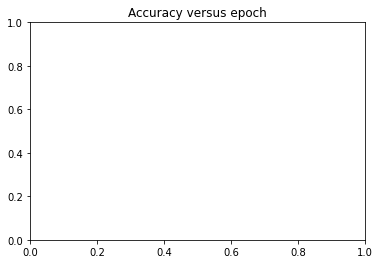

In [ ]:
from matplotlib import pyplot as plt
plt.title("Accuracy versus epoch") 
plt.plot(history2.history['acc'], label='training_accuracy') 
plt.plot(history2.history['val_acc'], label = 'val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
##MobileNet implementation

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.models import Model

In [ ]:
def createMobileNet():
  mn = MobileNet(include_top=False, weights='imagenet', input_shape=(227,227,3))
  print(mn.summary())
  for layer in mn.layers:
    layer.trainable=False
  x = Flatten()(mn.output)
  x = Dense(512,activation='relu')(x)
  x = Dense(512,activation='relu')(x)
  prediction = Dense(2,activation='sigmoid')(x)
  model = Model(inputs=mn.input, outputs=prediction)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
mn_model = createMobileNet()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 114, 114, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 114, 114, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 114, 114, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 114, 114, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 114, 114, 32)     128       
 ation)                                         

In [ ]:
checkpoint_path_mn = "gdrive/MyDrive/train_ckpt_mn/cp.ckpt"

In [ ]:
cp_callback_mn = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_mn,
                                                 save_best_only=True, 
                                                 save_weights_only=True, 
                                                 verbose=1)

In [ ]:
history_mn = mn_model.fit_generator(train_data,
                           validation_data=val_data,
                           epochs=5,
                           steps_per_epoch=len(train_data),
                           validation_steps=len(val_data),
                           callbacks=[cp_callback_mn])

<ipython-input-20-51d99ede673f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_mn = mn_model.fit_generator(train_data,


Epoch 1/5
126/126 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9958 
Epoch 1: val_loss improved from inf to 0.02929, saving model to gdrive/MyDrive/train_ckpt_mn/cp.ckpt
126/126 [==============================] - 2336s 19s/step - loss: 0.1311 - accuracy: 0.9958 - val_loss: 0.0293 - val_accuracy: 0.9930
Epoch 2/5
126/126 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9989
Epoch 2: val_loss did not improve from 0.02929
126/126 [==============================] - 370s 3s/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 0.0682 - val_accuracy: 0.9950
Epoch 3/5
126/126 [==============================] - ETA: 0s - loss: 2.6527e-04 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.02929
126/126 [==============================] - 373s 3s/step - loss: 2.6527e-04 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9940
Epoch 4/5
126/126 [==============================] - ETA: 0s - loss: 4.6016e-06 - accuracy: 1.0000
Epoch 4: val_l

In [ ]:
mn_model.save('gdrive/MyDrive/mn_sc_weights.h5')

In [ ]:
test_mn, accuracy_mn = mn_model.evaluate_generator(test_data,steps=50)

<ipython-input-22-dea2211aee4b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_mn, accuracy_mn = mn_model.evaluate_generator(test_data,steps=50)


In [ ]:
print(accuracy_mn)

0.9990059733390808


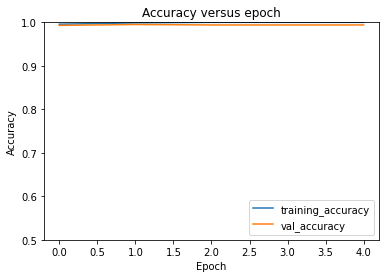

In [ ]:
from matplotlib import pyplot as plt
plt.title("Accuracy versus epoch") 
plt.plot(history_mn.history['accuracy'], label='training_accuracy') 
plt.plot(history_mn.history['val_accuracy'], label = 'val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

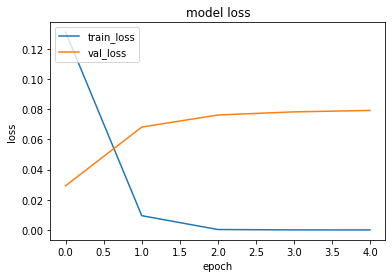

In [ ]:
plt.plot(history_mn.history['loss'])
plt.plot(history_mn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left') 
plt.show()